# <center>Computer Vision</center>  <center>Spring 2022</center> 

# Image Thresholding

Image thresholding comes under point operations and is a simplest form of image segmentation. It is a way to create a binary image from a grayscale or full-color image. This is typically done in order to separate "object" or foreground pixels from background pixels to aid in image processing. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

#### Importing required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read the image
img = cv2.imread('shapes.png', 0) #Reading in Grey scale mode

type(img)

numpy.ndarray

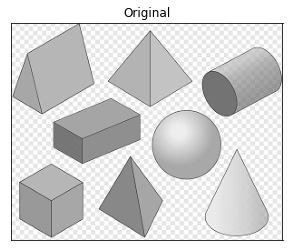

In [3]:
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
#   Checking image shape
r,c = img.shape

#   Creating same size empty image to hold result for binarization
b_img= np.zeros((r,c),np.uint8)

### How to automate threshold value?

The idea is to separate the image into two parts; the background and foreground.

+ Select initial threshold value, typically the mean 8-bit value of the original image.
+ Divide the original image into two portions;
    + Pixel values that are less than or equal to the threshold; background
    + Pixel values greater than the threshold; foreground
+ Find the average mean values of the two new images
+ Calculate the new threshold by averaging the two means.
+ If the difference between the previous threshold value and the new threshold value are below a specified limit, you are finished. Otherwise apply the new threshold to the original image keep trying.

In [5]:
#   Selecting initial threshold value as the mean value of the original image.
THRESH = img.mean()

#   Running loop until found the correct threshold value
while True:
    #   Getting a foreground image from the pixel values that are greater than threshold
    foreground_img = (img > THRESH) * img
    
    #   Getting a background image from the pixel values that are less than or equal to threshold
    background_img = (img <= THRESH) * img
    
    mean1 = foreground_img.mean()   #   Calculating mean of foreground image
    mean2 = background_img.mean()   #   Calculating mean of backeground image
    
    new_THRESH = (mean1 + mean2) / 2    #   calculating new threshold by averaging two means
    diff = new_THRESH - THRESH          #   calculating difference of new and old threshold
    
    if diff > 1e-4:            #    Checking if the difference is greater than a small value then set new_threshold as the threshold and repeat the process
        THRESH = new_THRESH
    else:                      #    else break the loop, the correct threshold has been found
        cv2.imwrite("foreground_img.jpg", foreground_img)
        cv2.imwrite("background_img.jpg", background_img)
        break

        
        
#   Now by using the found threshold, binarize the image
for i in range(r):
    for j in range(c):
        if(img[i,j] >= THRESH):
            b_img[i,j] = 255
        else:
            b_img[i,j]=0
            
cv2.imwrite("Binarized_Image.jpg", b_img)

True

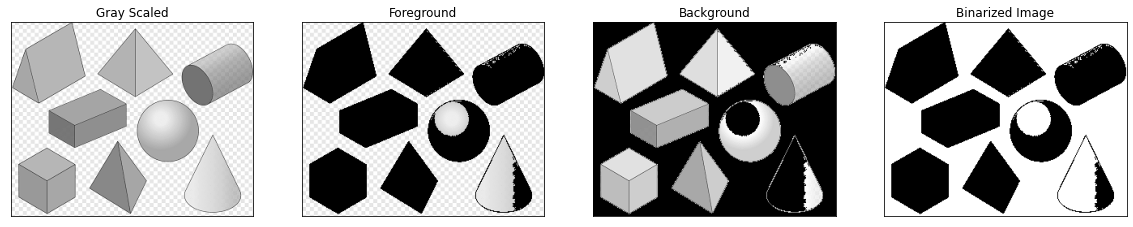

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title('Gray Scaled')
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.imshow(foreground_img, cmap='gray')
plt.title('Foreground')
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.imshow(background_img, cmap='gray')
plt.title('Background')
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.imshow(b_img, cmap='gray')
plt.title('Binarized Image')
plt.xticks([])
plt.yticks([])

plt.savefig("threshold_results.png")
plt.show()

### Thresholding using OpenCV

The function cv2.threshold is used to apply the thresholding. 

**Syntax:** cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 


+ The first argument is the source image, which should be a grayscale image. 
+ The second argument is the threshold value which is used to classify the pixel values. 
+ The third argument is the maximum value which is assigned to pixel values exceeding the threshold. 
+ The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.


**OpenCV provides different types of thresholding which is given by the fourth parameter of the function.**
+ cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
+ cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
+ cv2.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
+ cv2.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
+ cv2.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

In [6]:
# Read the image
img = cv2.imread('shapes.png')

# to convert the image in grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

##### Set threhold

In [7]:
# Set threhold
THRESH = 200

#### Apply different thresholding techniques using OpenCV

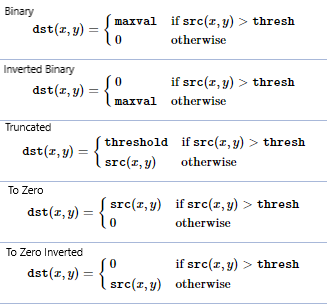

In [ ]:
# applying different thresholding techniques on the input image all pixels value above THRESH will be set to 255
thresh1, res_img1 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_BINARY)
thresh2, res_img2 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_BINARY_INV)
thresh3, res_img3 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TRUNC)
thresh4, res_img4 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TOZERO)
thresh5, res_img5 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TOZERO_INV)

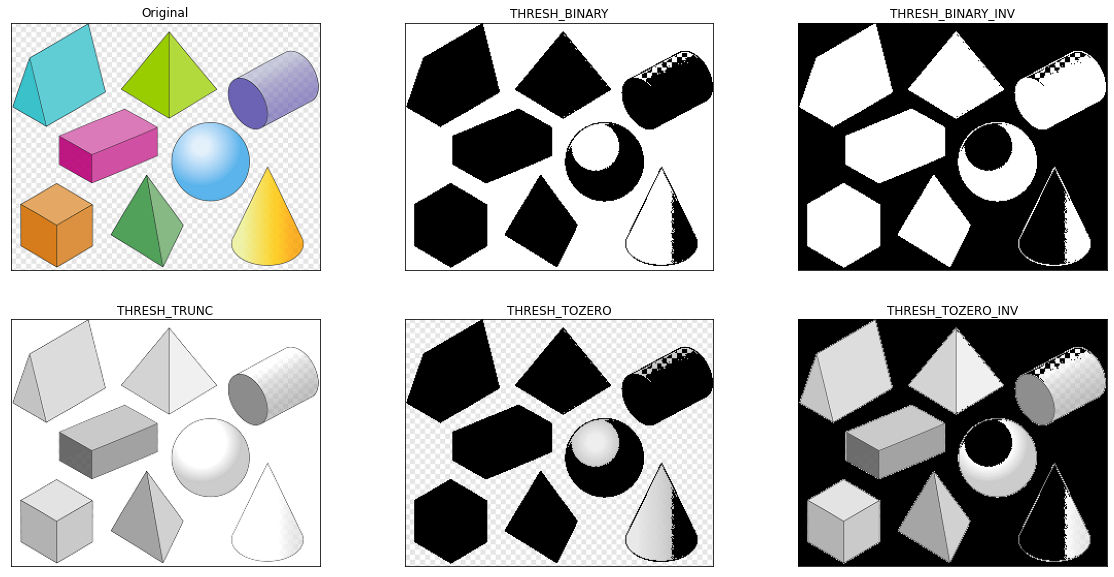

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(res_img1, cmap='gray')
plt.title('THRESH_BINARY')
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(res_img2, cmap='gray')
plt.title('THRESH_BINARY_INV')
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(res_img3, cmap='gray')
plt.title('THRESH_TRUNC')
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.imshow(res_img4, cmap='gray')
plt.title('THRESH_TOZERO')
plt.xticks([])
plt.yticks([])

plt.subplot(236)
plt.imshow(res_img5, cmap='gray')
plt.title('THRESH_TOZERO_INV')
plt.xticks([])
plt.yticks([])

plt.savefig("threshold_results2.png")
plt.show()